# Rainfall Prediction - Weather Forecasting

# Problem Definition

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

predict two things:
 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



# Data Loading and Description

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



# Data Analysis

In [109]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns ; sns.set()

import warnings
warnings.filterwarnings("ignore")

In [110]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Data Profiling

In [111]:
data.shape

(8425, 23)

In [112]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [113]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [114]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [116]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [117]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [118]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Preprocessing

In [119]:
data = data.dropna()

In [120]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [121]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


In [122]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [123]:
data.RainToday.value_counts()

No     2901
Yes     889
Name: RainToday, dtype: int64

# Making DataFrame for the Nominal Data

In [124]:
data_visualization_nominal=data[['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].copy()

In [125]:
data_visualization_nominal.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

# Visualization of the Data:

2011-05-30    5
2011-06-24    5
2011-02-17    5
2011-05-10    5
2011-02-06    5
             ..
2013-04-01    1
2013-04-22    1
2015-09-11    1
2013-05-11    1
2013-01-18    1
Name: Date, Length: 3004, dtype: int64


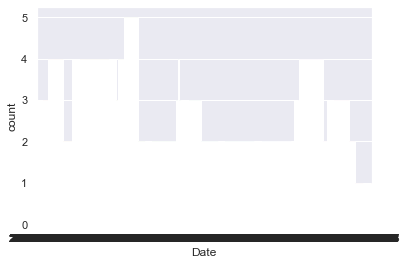

In [126]:
ax = sns.countplot(x="Date", data=df_visualization_nominal)
print(df_visualization_nominal["Date"].value_counts())

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


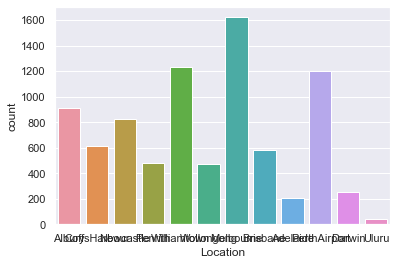

In [127]:
ax = sns.countplot(x="Location", data=df_visualization_nominal)
print(df_visualization_nominal["Location"].value_counts())

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64


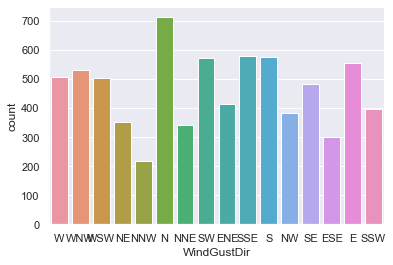

In [128]:
ax = sns.countplot(x="WindGustDir", data=df_visualization_nominal)
print(df_visualization_nominal["WindGustDir"].value_counts())

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64


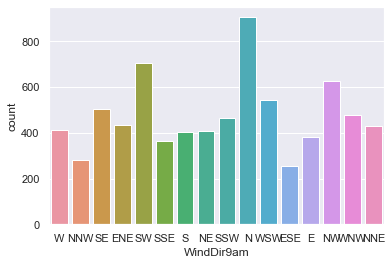

In [129]:
ax = sns.countplot(x="WindDir9am", data=df_visualization_nominal)
print(df_visualization_nominal["WindDir9am"].value_counts())

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64


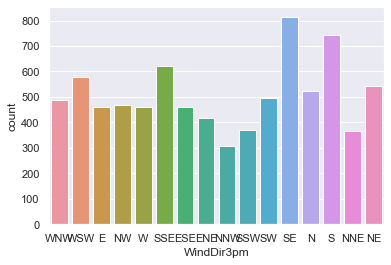

In [130]:
ax = sns.countplot(x="WindDir3pm", data=df_visualization_nominal)
print(df_visualization_nominal["WindDir3pm"].value_counts())

No     6195
Yes    1990
Name: RainToday, dtype: int64


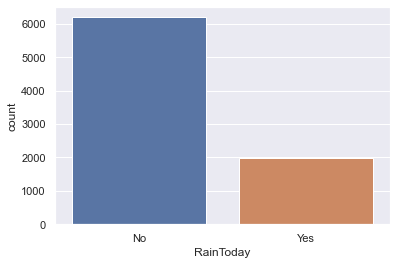

In [131]:
ax = sns.countplot(x="RainToday", data=df_visualization_nominal)
print(df_visualization_nominal["RainToday"].value_counts())

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64


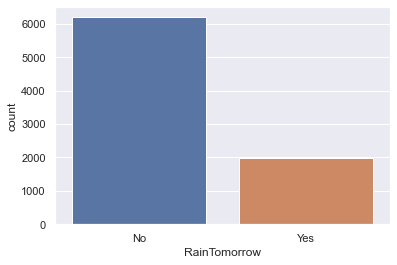

In [132]:
ax = sns.countplot(x="RainTomorrow", data=df_visualization_nominal)
print(df_visualization_nominal["RainTomorrow"].value_counts())

# Checking the distribution of the continous value of the float type columns

In [133]:
df_visualization_continous=df[["MinTemp","MaxTemp","Rainfall",'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

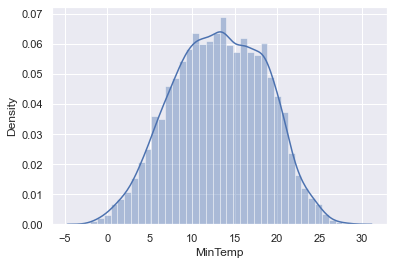

In [134]:
sns.distplot(df_visualization_continous['MinTemp'],kde=True)

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

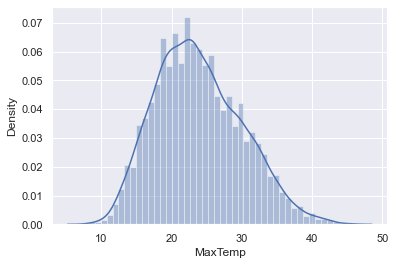

In [135]:
sns.distplot(df_visualization_continous['MaxTemp'],kde=True)

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

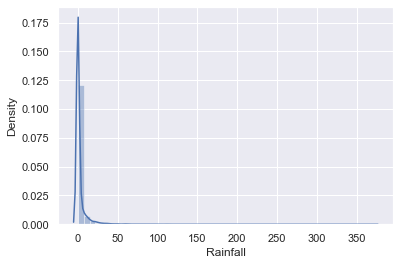

In [136]:
sns.distplot(df_visualization_continous['Rainfall'],kde=True)

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

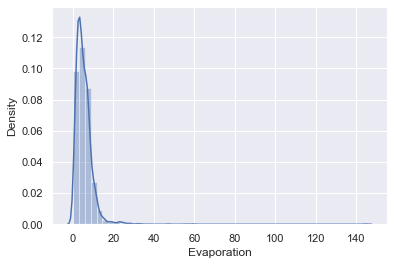

In [137]:
sns.distplot(df_visualization_continous['Evaporation'],kde=True)

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

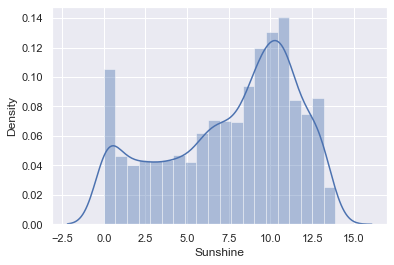

In [138]:
sns.distplot(df_visualization_continous['Sunshine'],kde=True)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

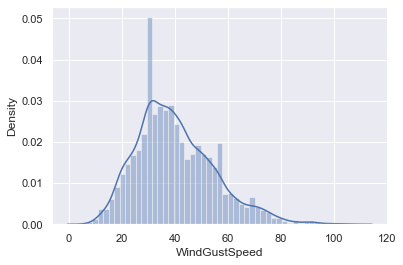

In [139]:
sns.distplot(df_visualization_continous['WindGustSpeed'],kde=True)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

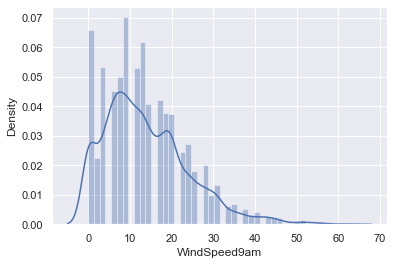

In [140]:
sns.distplot(df_visualization_continous['WindSpeed9am'],kde=True)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

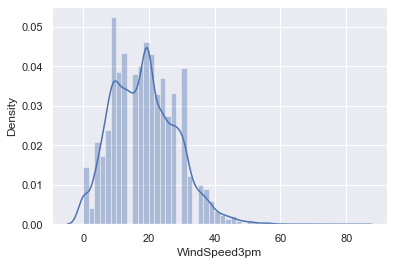

In [141]:
sns.distplot(df_visualization_continous['WindSpeed3pm'],kde=True)

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

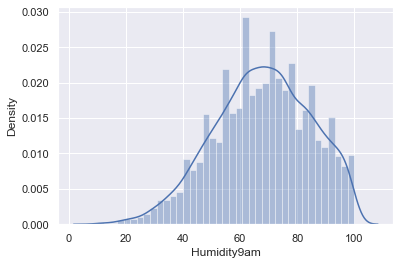

In [142]:
sns.distplot(df_visualization_continous['Humidity9am'],kde=True)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

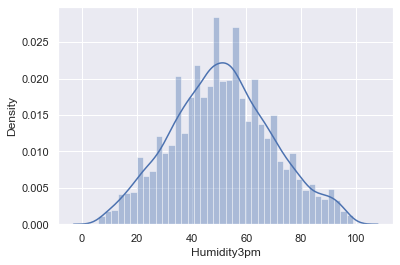

In [143]:
sns.distplot(df_visualization_continous['Humidity3pm'],kde=True)

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

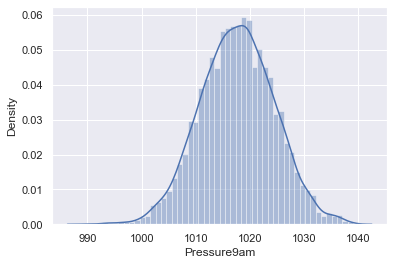

In [144]:
sns.distplot(df_visualization_continous['Pressure9am'],kde=True)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

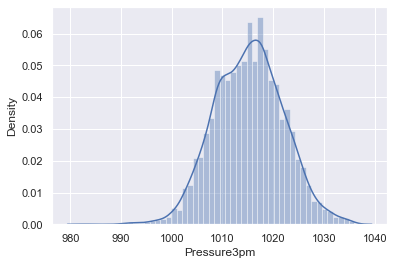

In [145]:
sns.distplot(df_visualization_continous['Pressure3pm'],kde=True)

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

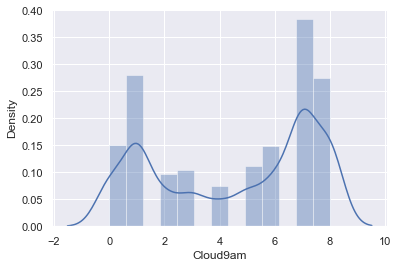

In [146]:
sns.distplot(df_visualization_continous['Cloud9am'],kde=True)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

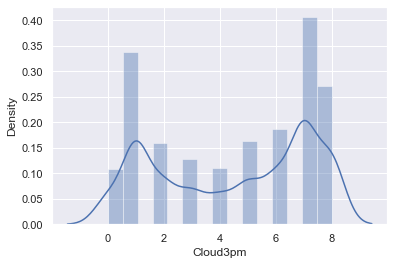

In [147]:
sns.distplot(df_visualization_continous['Cloud3pm'],kde=True)

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

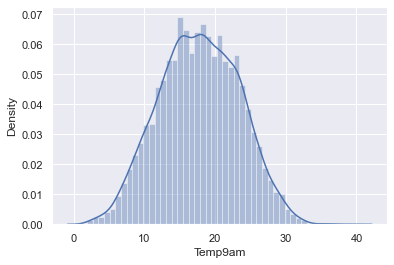

In [148]:
sns.distplot(df_visualization_continous['Temp9am'],kde=True)

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

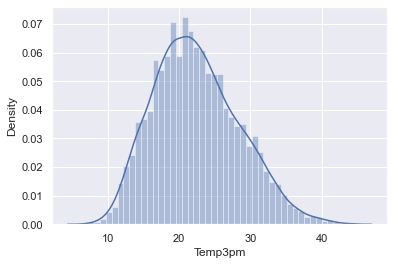

In [149]:
sns.distplot(df_visualization_continous['Temp3pm'],kde=True)

In [150]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

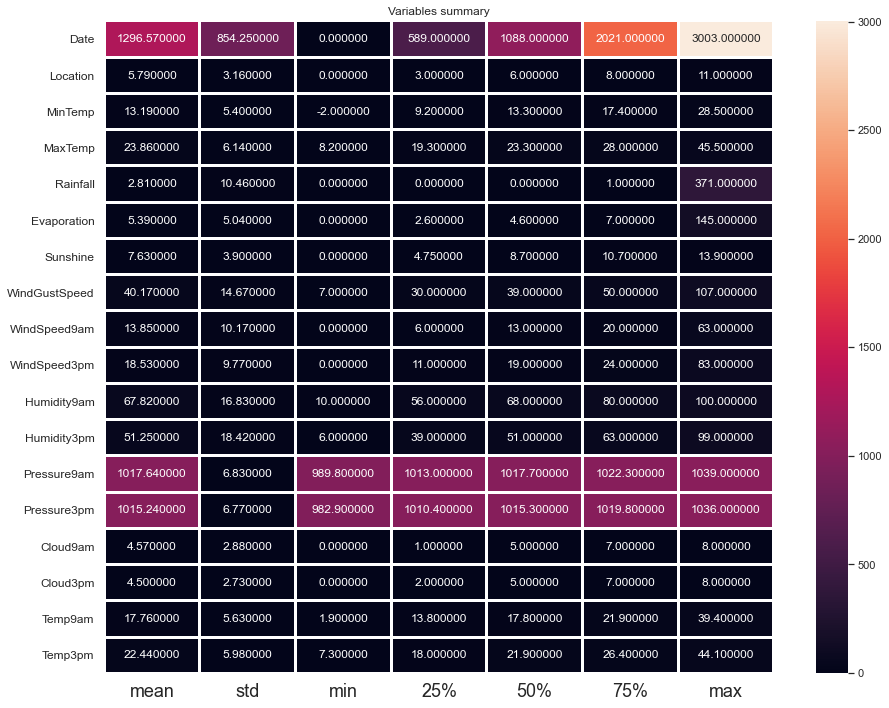

In [159]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   float64
 1   Location       8425 non-null   float64
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Correlation:

In [153]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.740095,0.071315,0.498337,0.080572,0.135500,0.067415,0.092084,-0.078824,0.044881,-0.475074,-0.485264,0.124513,0.038071,0.861185,0.713084
MaxTemp,0.740095,1.000000,-0.120673,0.595026,0.517246,0.122229,0.059749,0.051563,-0.416987,-0.426143,-0.354381,-0.453176,-0.311638,-0.309302,0.890487,0.977768
Rainfall,0.071315,-0.120673,1.000000,-0.064387,-0.237101,0.073402,0.001508,0.016936,0.304251,0.267475,-0.120569,-0.067936,0.221206,0.191268,-0.050368,-0.126175
Evaporation,0.498337,0.595026,-0.064387,1.000000,0.348017,0.258328,0.213671,0.180236,-0.399978,-0.316077,-0.277451,-0.298626,-0.141269,-0.190743,0.567189,0.581462
Sunshine,0.080572,0.517246,-0.237101,0.348017,1.000000,-0.013350,-0.019337,0.042117,-0.510185,-0.622432,0.019715,-0.057406,-0.701603,-0.720530,0.348258,0.541263
WindGustSpeed,0.135500,0.122229,0.073402,0.258328,-0.013350,1.000000,0.695486,0.704099,-0.246922,-0.146193,-0.359885,-0.328083,0.054118,0.124275,0.094809,0.084074
WindSpeed9am,0.067415,0.059749,0.001508,0.213671,-0.019337,0.695486,1.000000,0.517137,-0.342992,-0.212078,-0.161069,-0.141669,0.015041,0.076719,0.027315,0.053732
WindSpeed3pm,0.092084,0.051563,0.016936,0.180236,0.042117,0.704099,0.517137,1.000000,-0.151553,-0.061113,-0.271530,-0.226362,0.051006,0.065421,0.082761,0.023673
Humidity9am,-0.078824,-0.416987,0.304251,-0.399978,-0.510185,-0.246922,-0.342992,-0.151553,1.000000,0.659416,0.118130,0.170804,0.445165,0.350630,-0.359558,-0.409115
Humidity3pm,0.044881,-0.426143,0.267475,-0.316077,-0.622432,-0.146193,-0.212078,-0.061113,0.659416,1.000000,-0.045489,0.043131,0.486994,0.500553,-0.154409,-0.500537


In [154]:
df.corr()['Rainfall'].sort_values()

Sunshine        -0.209654
Temp3pm         -0.092263
MaxTemp         -0.088906
Pressure9am     -0.080412
Pressure3pm     -0.037270
Temp9am         -0.007191
Date             0.005027
Location         0.007789
WindSpeed3pm     0.025185
Evaporation      0.043463
WindSpeed9am     0.051349
MinTemp          0.091642
WindGustSpeed    0.104999
Cloud3pm         0.159250
Cloud9am         0.195157
Humidity9am      0.231702
Humidity3pm      0.238730
Rainfall         1.000000
Name: Rainfall, dtype: float64

Correlation using heatmap:

<AxesSubplot:>

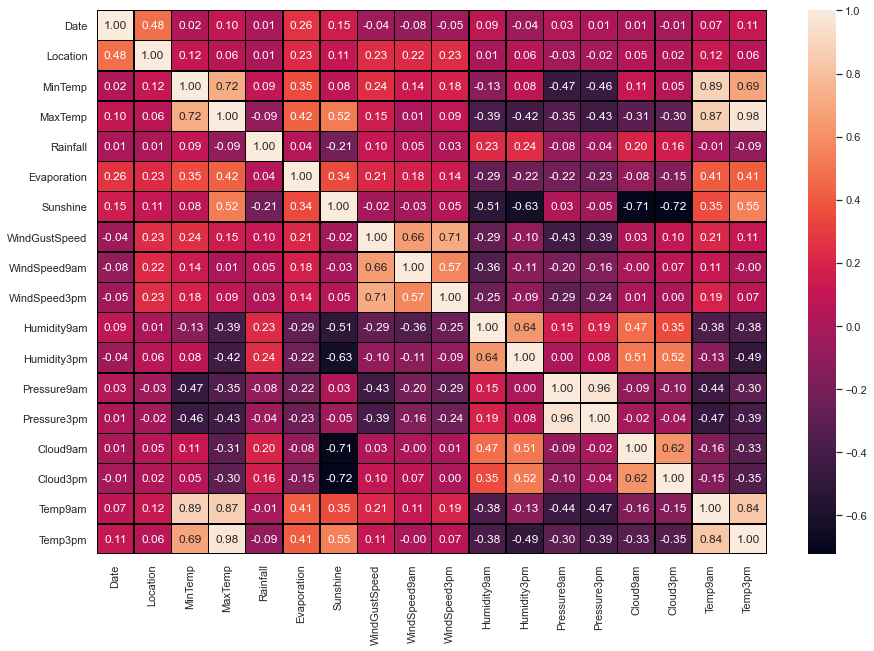

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black", fmt='.2f')

# Describing Datasets:

In [166]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


# Outliers Checking:

In [167]:
from sklearn.preprocessing import LabelEncoder
for column in data:
    if data[column].dtypes == 'object':
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,0,1,19.8,27.1,24.4,8.6,9.0,2,35.0,12,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
908,1,1,18.7,25.6,6.8,3.8,3.4,0,33.0,12,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
909,2,1,16.5,25.5,16.8,2.8,6.1,15,19.0,15,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
910,3,1,18.5,26.9,0.0,3.2,11.0,1,30.0,12,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
911,4,1,18.2,28.2,0.0,6.8,9.0,5,50.0,6,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1276,2,25.2,34.5,3.0,4.0,9.2,5,39.0,3,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1,0
8382,1277,2,26.2,33.3,0.0,6.0,5.9,3,54.0,1,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0,1
8383,1278,2,24.9,32.8,20.4,6.2,8.7,14,37.0,5,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1,0
8384,1279,2,25.5,33.1,0.0,4.8,7.1,10,37.0,0,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0,0


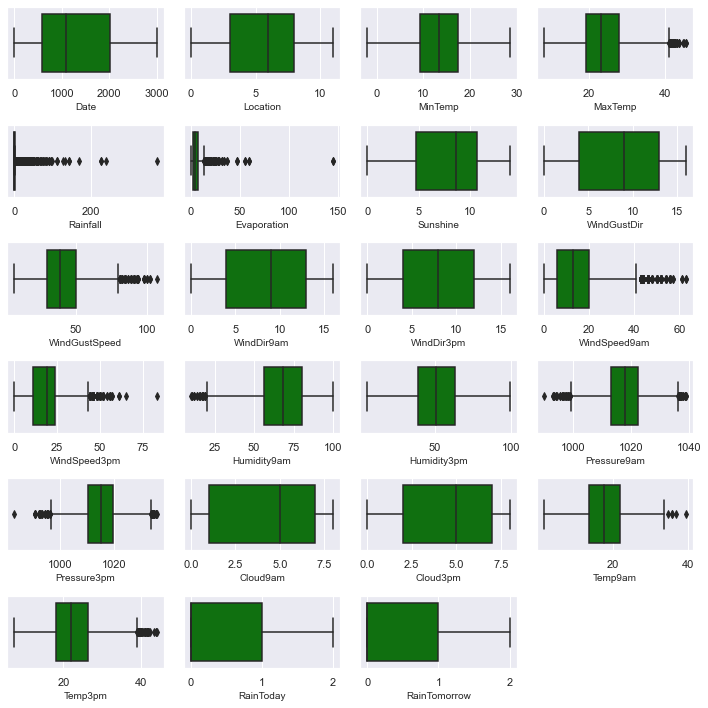

In [168]:
graph=1
plt.figure(figsize=(10,10))
for column in df:
    plt.subplot(6,4,graph)
    sns.boxplot(df[column],color='green',orient='h')
    plt.xlabel(column,fontsize=10)
    graph+=1
    plt.tight_layout()

# Skewness:

In [169]:
data.skew()

Date             0.343487
Location        -0.510193
MinTemp          0.039516
MaxTemp          0.237727
Rainfall         7.592966
Evaporation      2.114169
Sunshine        -0.591076
WindGustDir      0.004110
WindGustSpeed    0.699143
WindDir9am       0.030790
WindDir3pm      -0.054372
WindSpeed9am     0.935658
WindSpeed3pm     0.356434
Humidity9am     -0.194562
Humidity3pm      0.174915
Pressure9am      0.032381
Pressure3pm      0.096222
Cloud9am        -0.128711
Cloud3pm        -0.155781
Temp9am          0.029503
Temp3pm          0.239057
RainToday        1.253358
RainTomorrow     1.253358
dtype: float64

# Data Cleaning:

In [170]:
data.corr()["Rainfall"]

Date            -0.030191
Location        -0.057983
MinTemp          0.071315
MaxTemp         -0.120673
Rainfall         1.000000
Evaporation     -0.064387
Sunshine        -0.237101
WindGustDir      0.108397
WindGustSpeed    0.073402
WindDir9am       0.131331
WindDir3pm       0.064068
WindSpeed9am     0.001508
WindSpeed3pm     0.016936
Humidity9am      0.304251
Humidity3pm      0.267475
Pressure9am     -0.120569
Pressure3pm     -0.067936
Cloud9am         0.221206
Cloud3pm         0.191268
Temp9am         -0.050368
Temp3pm         -0.126175
RainToday        0.558509
RainTomorrow     0.284318
Name: Rainfall, dtype: float64

# Removing Outliers:

Z-Score Technique:

In [171]:
from scipy.stats import zscore
import numpy as np

In [172]:
z=np.abs(zscore(data))
z.shape

(3790, 23)

In [173]:
threshold=3
print(np.where(z>3))

(array([  26,   39,   41,   67,   88,  252,  253,  311,  312,  402,  403,
        456,  457,  458,  517,  518,  536,  548,  557,  564,  564,  567,
        571,  574,  578,  582,  583,  586,  587,  589,  592,  596,  599,
        603,  606,  610,  613,  617,  620,  624,  631,  647,  654,  654,
        657,  661,  664,  668,  672,  673,  676,  677,  679,  682,  686,
        689,  693,  696,  700,  703,  707,  710,  714,  721,  734,  734,
        769,  771,  820,  820,  821,  840,  851,  858,  873,  874,  875,
        879,  879,  931,  971,  976,  976,  991, 1007, 1025, 1025, 1029,
       1041, 1041, 1041, 1042, 1046, 1064, 1068, 1071, 1071, 1096, 1108,
       1112, 1124, 1135, 1149, 1224, 1224, 1227, 1237, 1238, 1238, 1239,
       1239, 1239, 1247, 1264, 1265, 1273, 1286, 1288, 1289, 1289, 1297,
       1297, 1332, 1334, 1383, 1383, 1384, 1403, 1414, 1421, 1436, 1437,
       1438, 1442, 1442, 1494, 1534, 1539, 1539, 1554, 1570, 1588, 1588,
       1592, 1604, 1604, 1604, 1605, 1609, 1627, 1

In [174]:
len(np.where(z>3)[0])

234

In [175]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,0,1,19.8,27.1,24.4,8.6,9.0,2,35.0,12,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
908,1,1,18.7,25.6,6.8,3.8,3.4,0,33.0,12,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
909,2,1,16.5,25.5,16.8,2.8,6.1,15,19.0,15,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
910,3,1,18.5,26.9,0.0,3.2,11.0,1,30.0,12,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
911,4,1,18.2,28.2,0.0,6.8,9.0,5,50.0,6,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1276,2,25.2,34.5,3.0,4.0,9.2,5,39.0,3,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1,0
8382,1277,2,26.2,33.3,0.0,6.0,5.9,3,54.0,1,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0,1
8383,1278,2,24.9,32.8,20.4,6.2,8.7,14,37.0,5,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1,0
8384,1279,2,25.5,33.1,0.0,4.8,7.1,10,37.0,0,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0,0


In [176]:
data_new=data[(z<3).all(axis=1)]
print("Old Dataframe", data.shape)
print("New Dataframe",data_new.shape)
print("total_dropped_rows", data.shape[0]-data_new.shape[0])

Old Dataframe (3790, 23)
New Dataframe (3592, 23)
total_dropped_rows 198


# Percentage data loss:

In [177]:
loss_percent=(3790-3592)/3790*100
print(loss_percent,'%')

5.224274406332454 %


# Model without outliers is df and model with desired outliers is data_new:

In [179]:
x=data_new.iloc[:,:-1]
y=data_new.iloc[:,-1]

# Transforming data to remove skewness:

In [183]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [184]:
x

array([[-2.46574642, -1.10211597,  1.12092769, ...,  0.56639307,
         0.51341002,  1.8787321 ],
       [-2.44675416, -1.10211597,  0.91357881, ...,  0.38609339,
        -0.34668435,  1.8787321 ],
       [-2.43111254, -1.10211597,  0.4961915 , ...,  0.38609339,
         0.26802482,  1.8787321 ],
       ...,
       [ 0.9149084 , -0.59311375,  2.07076105, ...,  1.90676442,
         1.4422276 ,  1.8787321 ],
       [ 0.91678048, -0.59311375,  2.18131184, ...,  1.74706743,
         1.36771855, -0.53227387],
       [ 0.91865217, -0.59311375,  2.07076105, ...,  1.95992781,
         1.61911901, -0.53227387]])

In [185]:
pd.DataFrame(x).skew()

0    -0.008123
1    -0.020582
2    -0.006691
3    -0.013952
4     0.861732
5    -0.001109
6    -0.041248
7    -0.061132
8    -0.008986
9    -0.063427
10   -0.040822
11   -0.003439
12    0.006688
13   -0.011094
14    0.009172
15    0.000000
16    0.000000
17   -0.100974
18   -0.086297
19   -0.018096
20   -0.013262
21    1.347021
dtype: float64

In [186]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.46574642, -1.10211597,  1.12092769, ...,  0.56639307,
         0.51341002,  1.8787321 ],
       [-2.44675416, -1.10211597,  0.91357881, ...,  0.38609339,
        -0.34668435,  1.8787321 ],
       [-2.43111254, -1.10211597,  0.4961915 , ...,  0.38609339,
         0.26802482,  1.8787321 ],
       ...,
       [ 0.9149084 , -0.59311375,  2.07076105, ...,  1.90676442,
         1.4422276 ,  1.8787321 ],
       [ 0.91678048, -0.59311375,  2.18131184, ...,  1.74706743,
         1.36771855, -0.53227387],
       [ 0.91865217, -0.59311375,  2.07076105, ...,  1.95992781,
         1.61911901, -0.53227387]])

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [188]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100, '\n')

At random state 37 The model performs very well
At random state:- 37
Training accuracy_score is:- 86.18169161155586
Testing accuracy_score is:- 86.23087621696801 

At random state 134 The model performs very well
At random state:- 134
Training accuracy_score is:- 86.216498433693
Testing accuracy_score is:- 86.23087621696801 

At random state 193 The model performs very well
At random state:- 193
Training accuracy_score is:- 86.18169161155586
Testing accuracy_score is:- 86.23087621696801 

At random state 199 The model performs very well
At random state:- 199
Training accuracy_score is:- 86.216498433693
Testing accuracy_score is:- 86.23087621696801 

At random state 215 The model performs very well
At random state:- 215
Training accuracy_score is:- 86.3905325443787
Testing accuracy_score is:- 86.36995827538247 

At random state 218 The model performs very well
At random state:- 218
Training accuracy_score is:- 86.14688478941872
Testing accuracy_score is:- 86.09179415855354 

At random s

In [190]:
x_tarin,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=718)

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       575
           1       0.15      0.12      0.13       144

    accuracy                           0.69       719
   macro avg       0.47      0.48      0.47       719
weighted avg       0.66      0.69      0.68       719



# Cross validation score for loigistic reygression:

In [192]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lsc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 75.50111358574611
accuracy_score is:- 75.50111358574611


At cv:- 3
Cross validation score is:- 84.77205348745636
accuracy_score is:- 84.77205348745636


At cv:- 4
Cross validation score is:- 84.54899777282851
accuracy_score is:- 84.54899777282851


At cv:- 5
Cross validation score is:- 83.99351466947671
accuracy_score is:- 83.99351466947671


At cv:- 6
Cross validation score is:- 84.96779284686666
accuracy_score is:- 84.96779284686666


At cv:- 7
Cross validation score is:- 84.3273878600522
accuracy_score is:- 84.3273878600522


At cv:- 8
Cross validation score is:- 85.32850779510022
accuracy_score is:- 85.32850779510022


At cv:- 9
Cross validation score is:- 84.52151211361738
accuracy_score is:- 84.52151211361738




In [193]:
lsscore_selected=cross_val_score(lr,x,y,cv=6).mean()
print("The cv score is: ", lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8496779284686666 
The accuracy score is:  0.8650904033379694


# Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test , mod1.predict(y_train))

array([[1631,  115],
       [ 226,  302]], dtype=int64)

# DecisionTree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
mod2 = DecisionTreeClassifier()

In [92]:
mod2.fit(x_train , x_test)

DecisionTreeClassifier()

In [93]:
accuracy_score(y_test , mod2.predict(y_train))*100

83.50923482849603

# RandomForest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
mod3 = RandomForestClassifier()

In [96]:

mod3.fit(x_train , x_test)

RandomForestClassifier()

accuracy_score(y_test , mod3.predict(y_train))*100

# Conclusions

learnt about EDA function through Pandas and other plotting libraries.

used matplotlib, plotly and seaborn to develop better insights about the data.

preproceesing helps in dealing with missing values and irregualities present in the data.

Analyzed which model will be work with better accuracy with the help of z scores.

used Test Train, Cross Validation, Confusion Matrix, Decision Tree and other applicable and required models to get best predictions.